In [30]:
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import itertools


In [43]:
def theOriginalNN(X,Y):
    model = Sequential()
#     print("The weights at the start are ")
#     print(model.layers[0].get_weights()[0])
    
    model.add(Dense(2, activation = 'relu'))
    #model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))
    
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
   

    print(X_train.shape,Y_train.shape)
    print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_tr = Y_train
    Y_train = to_categorical(Y_train)
    print(Y_train.shape)
    Y_test = to_categorical(Y_test)
   
    e = 50   #The number of epochs
    obj = model.fit(X_train, Y_train, epochs = e, shuffle = True, verbose=2, validation_split=0.2)
    
    
   
 #  Ways to gettt and set weights https://www.codespeedy.com/get_weights-and-set_weights-functions-in-keras-layers/ 
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    
    plt.plot(Epoch, Loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("The LOSS Graph")
    plt.show()
    
    plt.plot(Epoch, Accuracy)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("The ACCURACY graph")
    plt.show()
    
    
    print(f'Test results - Loss: {scores[0]} - Accuracy: {scores[1]*100}%')
    
    

    # Plot decision boundary

    #print(X_test)
    # print(Y_test)
    # print(Y_tt)
    #Y_test = Y_test.astype(np.int_)
    # X_testing = X[:training_split, :]
    # Targets_testing = Y[:training_split]

    # Plot decision boundary
    #Y_train=Y_train.astype(np.int_)
#     print(Y_tt)
#     print(X_test)
    plot_decision_regions(X_test, np.argmax(Y_test, axis=1), clf=model, legend=2)
    plt.show()
    
    print("The weights at the end are ")
    print(model.layers[1].get_weights()[1])
    print(obj.history["loss"])
    #return model.layers[1].get_weights()[1]



In [44]:
def theNewNN(X,Y,weights):
    model = Sequential()
#     print("The weights at the start are ")
#     print(model.layers[0].get_weights()[0])
    
    model.add(Dense(2, activation = 'relu'))
    #model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))
    
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
   

    print(X_train.shape,Y_train.shape)
    print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_train = to_categorical(Y_train)
    print(Y_train.shape)
    Y_test = to_categorical(Y_test)
   
    e = 50   #The number of epochs
    obj = model.fit(X_train, Y_train, epochs = e, shuffle = True, verbose=2)
    
    
#     print("The weights at the end are ")
#     print(model.layers[0].get_weights()[]) 
#  Ways to gettt and set weights https://www.codespeedy.com/get_weights-and-set_weights-functions-in-keras-layers/ 
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    
    plt.plot(Epoch, Loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("The LOSS Graph")
    plt.show()
    
    plt.plot(Epoch, Accuracy)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("The ACCURACY graph")
    plt.show()
    
    
    print(f'Test results - Loss: {scores[0]} - Accuracy: {scores[1]*100}%')
    
    

    # Plot decision boundary

    #print(X_test)
    # print(Y_test)
    # print(Y_tt)
    #Y_test = Y_test.astype(np.int_)
    # X_testing = X[:training_split, :]
    # Targets_testing = Y[:training_split]

    # Plot decision boundary
    Y_test=Y_test.astype(np.int_)
    print(Y_tt)
    print(X_test)
    plot_decision_regions(X_test, Y_tt, clf=model, legend=2)
    plt.show()
    
    



In [45]:
#New Dataset
def NewCall():
    #Class 3
    mean = [5,5]
    cov = [[10,0],
           [0,10]] 
    Class3 = np.random.multivariate_normal(mean,cov,500)

    #Class 4
    mean = [-5,5]
    cov = [[10,0],
           [0,10]] 
    Class4 = np.random.multivariate_normal(mean,cov,500)
    
    X = np.vstack([Class3, Class4])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*500 + [1]*500)
    #print(Y)

    one_hot_labels = np.zeros((1000, 2))

    for i in range(1000):
        one_hot_labels[i, Y[i]] = 1

    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()

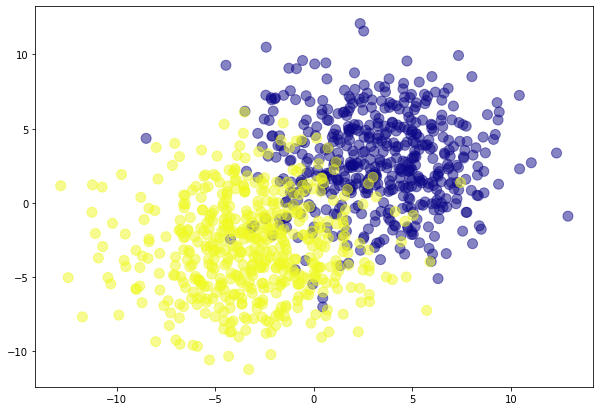

(700, 2) (700,)
(300, 2) (300,)
(700, 2)
Epoch 1/50
18/18 - 0s - loss: 1.1559 - accuracy: 0.1536 - val_loss: 1.0491 - val_accuracy: 0.1929
Epoch 2/50
18/18 - 0s - loss: 0.9226 - accuracy: 0.2089 - val_loss: 0.8359 - val_accuracy: 0.2786
Epoch 3/50
18/18 - 0s - loss: 0.7775 - accuracy: 0.2857 - val_loss: 0.7108 - val_accuracy: 0.3357
Epoch 4/50
18/18 - 0s - loss: 0.6936 - accuracy: 0.3679 - val_loss: 0.6319 - val_accuracy: 0.3857
Epoch 5/50
18/18 - 0s - loss: 0.6388 - accuracy: 0.6214 - val_loss: 0.5803 - val_accuracy: 0.8143
Epoch 6/50
18/18 - 0s - loss: 0.6005 - accuracy: 0.7643 - val_loss: 0.5411 - val_accuracy: 0.8429
Epoch 7/50
18/18 - 0s - loss: 0.5690 - accuracy: 0.7750 - val_loss: 0.5105 - val_accuracy: 0.8786
Epoch 8/50
18/18 - 0s - loss: 0.5418 - accuracy: 0.7893 - val_loss: 0.4839 - val_accuracy: 0.8786
Epoch 9/50
18/18 - 0s - loss: 0.5183 - accuracy: 0.7982 - val_loss: 0.4587 - val_accuracy: 0.8786
Epoch 10/50
18/18 - 0s - loss: 0.4954 - accuracy: 0.8071 - val_loss: 0.4362 -

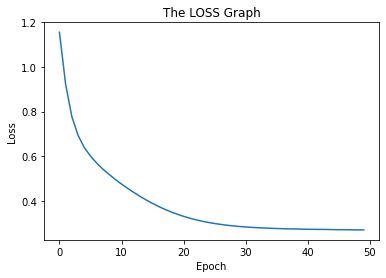

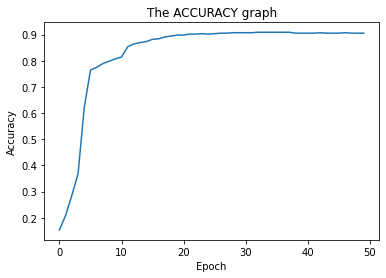

Test results - Loss: 0.28336548805236816 - Accuracy: 88.33333253860474%


ValueError: cannot reshape array of size 248832 into shape (288,432)

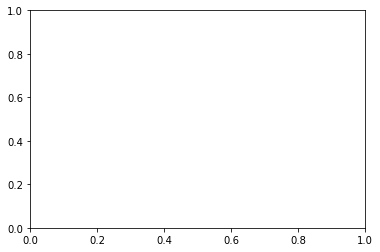

In [46]:
def main():
    #Class 1
    mean = [3,3]
    cov = [[10,0],
           [0,10]] 
    Class1 = np.random.multivariate_normal(mean,cov,500)

    #Class 2
    mean = [-3,-3]
    cov = [[10,0],
           [0,10]] 
    Class2 = np.random.multivariate_normal(mean,cov,500)    
    

    X = np.vstack([Class1, Class2])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*500 + [1]*500)
    #print(Y)

    one_hot_labels = np.zeros((1000, 2))

    for i in range(1000):
        one_hot_labels[i, Y[i]] = 1

    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    theOriginalNN(X,Y)
    
if __name__ == "__main__":
    main()